In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.

cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode

cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

In [2]:
image = cv2.imread('../images/fruits.jpg', cv2.IMREAD_GRAYSCALE)

(525, 525)


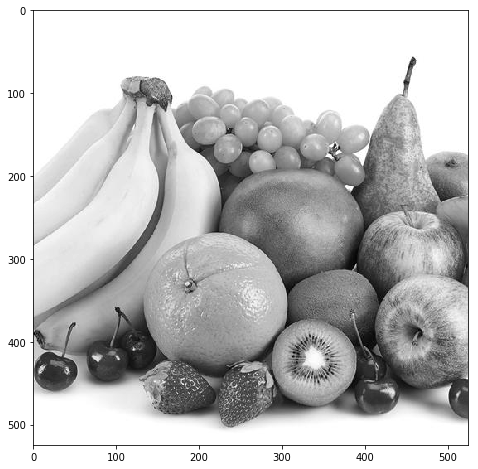

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(image, cmap='gray') #cmap='gray' because without this, matplotlib will show a different shade image
print(image.shape)

Text(0.5,1,'Cropped Image')

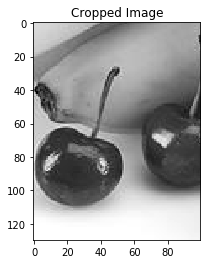

In [4]:
# CROPPING IMAGE
y = 350
x = 0
h = 130 # Height
w = 100 # Width
fruit1 = image[y:y+h,x:x+w]
plt.imshow(fruit1, cmap='gray')
plt.title("Cropped Image")

Text(0.5,1,'Cropped Image')

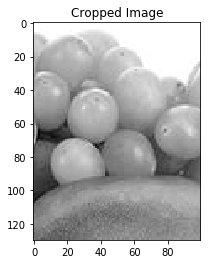

In [5]:
fruit2 = image[100:100+h,250:250+w]
plt.imshow(fruit2, cmap='gray')
plt.title("Cropped Image")

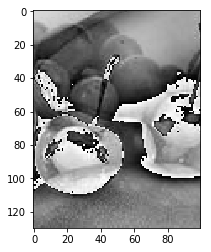

In [6]:
# Adding two images together might cause other values to reach the maximum value of 255 and start clipping the image.
plt.imshow(fruit1+fruit2, cmap='gray')

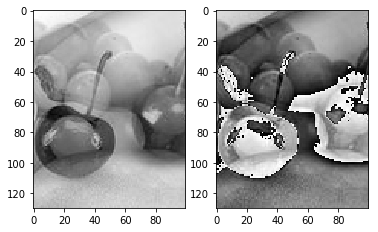

In [7]:
plt.subplot(1, 2, 1)
#Adding both images with weights of 0.5 each to avoid clipping
plt.imshow(0.5* fruit1+ 0.5* fruit2, cmap='gray')


plt.subplot(1, 2, 2)
#Adding both image then dividing by two is not the same as we did above
plt.imshow((fruit1+fruit2)//2, cmap='gray')

In [8]:
# mean and standard deviation
mean, sigma = 0,0.1  

# Gaussian Noise
g_noise = np.random.normal(mean, sigma, image.shape) 

In [9]:
# g_noise has values less than one
# We map these values to [0 255] so we can add it to our original image
g_noise = np.interp(g_noise, [0,1], [0,255])
g_noise = np.float32(g_noise)

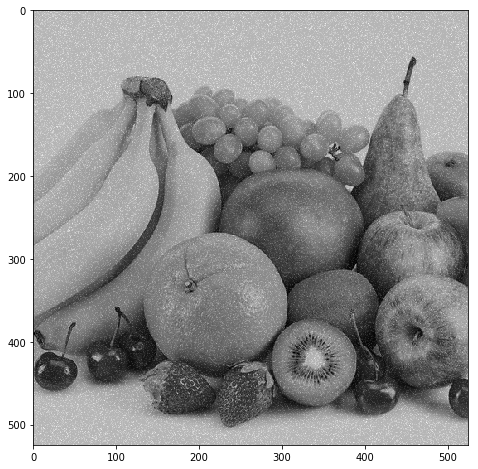

In [10]:
image_with_gnoise = image + g_noise
plt.figure(figsize=(8,8))
plt.imshow(image_with_gnoise, cmap='gray')

In [11]:
#Salt and Pepper Noise Generation

def saltpepper_noise(image, probability):
    import random
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - probability 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < probability:
                output[i][j] = 0
            elif rdn > threshold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return np.float32(output)

Text(0.5,1,'after Median Blur')

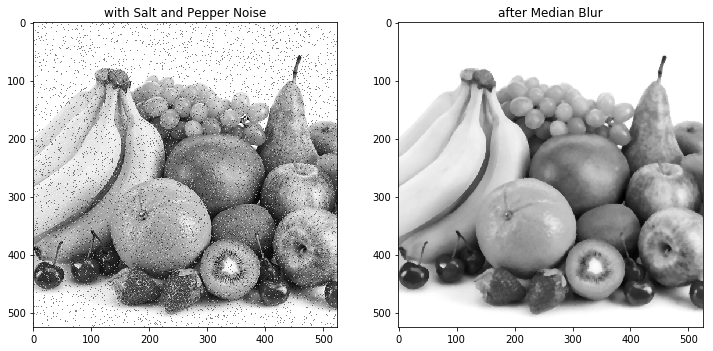

In [12]:

plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
image_with_saltpepper = image+saltpepper_noise(image,0.05)
plt.imshow(image_with_saltpepper, cmap='gray')
plt.title("with Salt and Pepper Noise")

# Median Blur works very well with salt and pepper noises
plt.subplot(1, 2, 2)
median = cv2.medianBlur(image_with_saltpepper, 5) #This 5 here is the range to check the neghboring pixels
plt.imshow(median, cmap='gray')
plt.title("after Median Blur")

Text(0.5,1,'Averaging Filter / Blur')

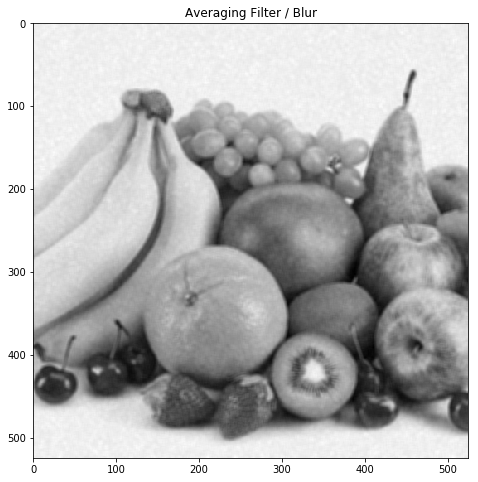

In [13]:
# Averaging Filter is also a blurring filter
# You create a kernel that has values of 1 and you normalize it.

kernel = np.ones((5,5), np.float32)/25
plt.figure(figsize=(8,8))
# cv2.filter2D - Convolving the kernel within the image
plt.imshow(cv2.filter2D(image_with_gnoise,-1,kernel), cmap='gray')
plt.title("Averaging Filter / Blur")

Text(0.5,1,'Gaussian Blur')

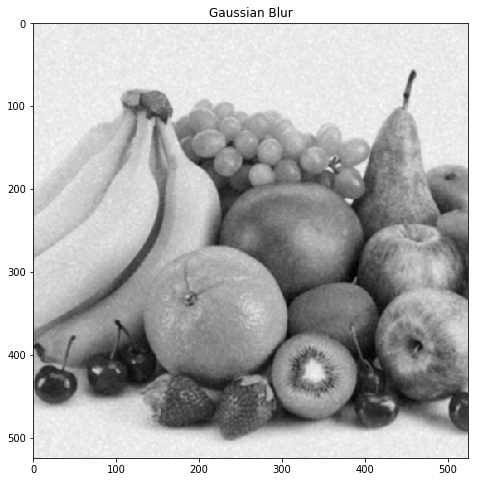

In [14]:
# Gaussian Blur

blur = cv2.GaussianBlur(image_with_gnoise,(5,5),0)
plt.figure(figsize=(8,8))
plt.imshow(blur, cmap='gray')
plt.title("Gaussian Blur")

Text(0.5,1,'Blurring, keeping Edges')

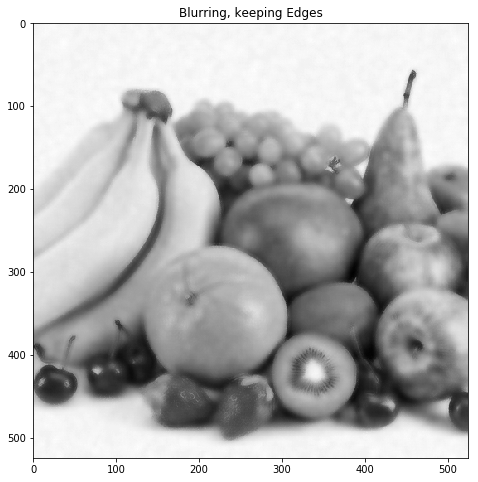

In [15]:
# Bilateral Filter work effectively when blurring but you want to keep the edges
# bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])

blur = cv2.bilateralFilter(np.float32(image_with_gnoise),10,100,100)
plt.figure(figsize=(8,8))
plt.imshow(blur, cmap='gray')
plt.title("Blurring, keeping Edges")

In [16]:
# COLORED IMAGES

In [17]:
image = cv2.imread('../images/fruits.jpg', cv2.IMREAD_COLOR)

Text(0.5,1,'Image in BGR format with OpenCV')

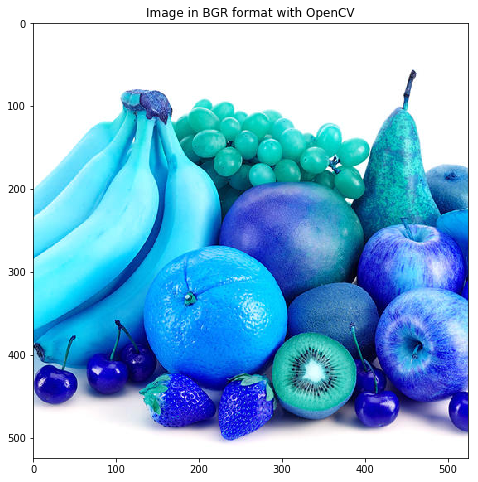

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.title("Image in BGR format with OpenCV")

# OpenCV has a BGR set of matrix and not in RGB format.
# That is the reason why the below image has weird colors.
# To fix this, we need to create a function to do BGR -> RGB

In [19]:
# BGR to RGB function

def to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Text(0.5,1,'Original Image')

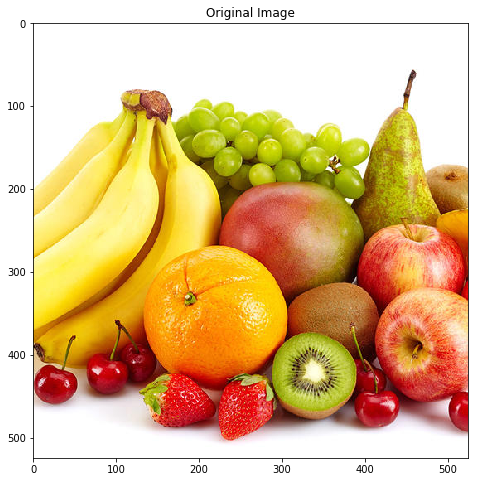

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(to_rgb(image))
plt.title("Original Image")

Text(0.5,1,'Blurred Image')

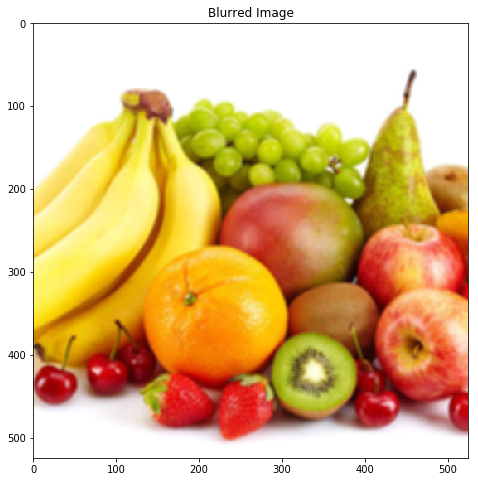

In [21]:
# BLURRING

kernel = np.ones((5,5), np.float32)/25
plt.figure(figsize=(8,8))
image_withAveraging = cv2.filter2D(image,-1,kernel)
plt.imshow(to_rgb(image_withAveraging))
plt.title("Blurred Image")

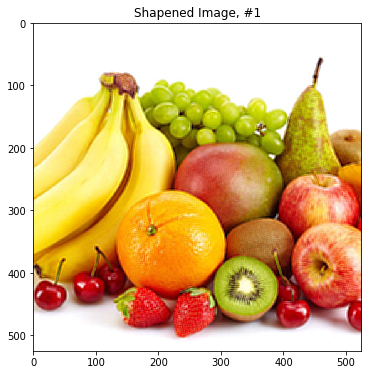

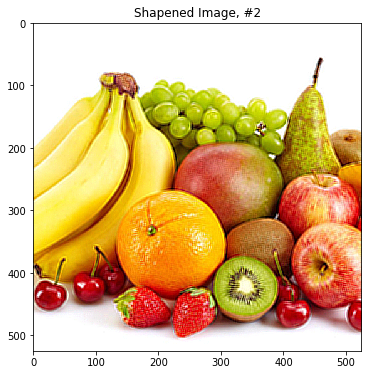

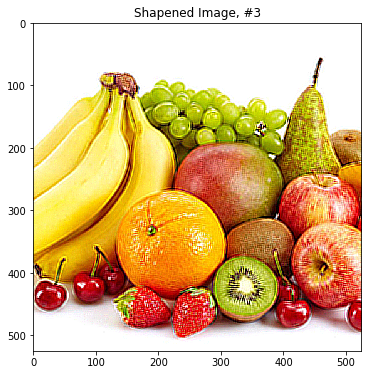

In [22]:
# SHARPENING FILTER
# You subtract an impluse matrix
kernel = np.zeros((5,5), np.float32)
kernel[2,2] = 2.0  #Center value
box_filter = np.ones((5,5), np.float32)/25
kernel = kernel - box_filter

sharpened_image = cv2.filter2D(image_withAveraging, -1, kernel)
for i in range(1,4):
    plt.figure(figsize=(20,15))
    plt.subplot(1,3,i)
    sharpened_image = cv2.filter2D(sharpened_image, -1, kernel)
    plt.imshow(to_rgb(sharpened_image))
    plt.title("Shapened Image, #{}".format(i))
